In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
plt.style.use('seaborn')

In [15]:
dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')
print(dfx.shape)
print(dfy.shape)

(399, 3)
(399, 2)


In [16]:
X = dfx.values
Y = dfy.values


#drop the first column of X and Y
X = X[:,1:]
Y = Y[:,1:].reshape((-1,))

print(Y)


print(X.shape)
print(Y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(399, 2)
(399,)


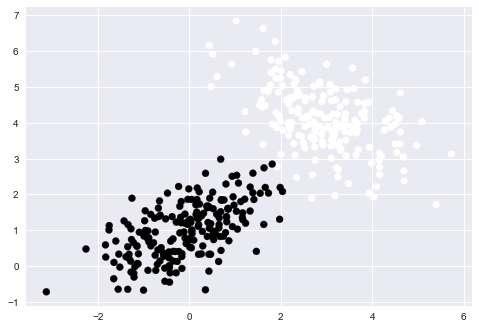

In [17]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

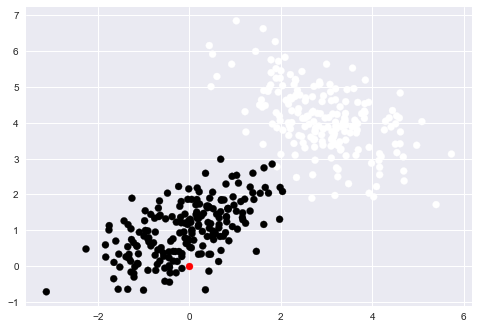

In [38]:
#we want to generate a query point and generate predictions for that point
query_x = np.array([0,0])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')

In [39]:
#using eucleidian distance function
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,querypoint,k=5):
    vals=[]
    m = X.shape[0]
    
    for i in range(m):
        d = dist(querypoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    #nearest/first k points
    vals = vals[:k]
    vals = np.array(vals)
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [40]:
x = knn(X, Y, query_x)
print(x)

(array([1.]), array([5], dtype=int64))
1.0
